In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
#%pip install xgboost

import xgboost as xgb
from xgboost import plot_importance
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA


Bad key "text.kerning_factor" on line 4 in
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
file=pd.read_excel("Merged files_1.xlsx",header=0)

In [3]:
file.columns

Index(['Datum i vrijeme', 'Plinomjer ist.zgrada 00062313Plin (m3)',
       'Brojilo el.energije su 35649294El.energija VT (kWh)',
       'Brojilo el.energije su 35649294El.energija MT (kWh)',
       'Kalorimetar 1 39024788Topl.energija (MWh)',
       'Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Tren.protok (m3/h)',
       'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)',
       'Kalorimetar 2 39024724Kum.protok (m3)',
       'Kalorimetar 2 39024724Tren.protok (m3/h)',
       'Kalorimetar 3 39024787Topl.energija (MWh)',
       'Kalorimetar 3 39024787Kum.protok (m3)',
       'Kalorimetar 3 39024787Tren.protok (m3/h)',
       'Kalorimetar 3 39024787Temp.pol.voda (°C)',
       'Kalorimetar 3 39024787Temp.pov.voda (°C)',
       'Temp.senzor un.1 24003403Temperatura (°C)',
       'Temp.senzor un.1 24003403Vlažnost (%)',
       'Temp.senzor un.2 24004659Temperatura (°C)',
       'Temp.senzor un.2 24004659Vlažnost (%)',
   

In [4]:
file.isna().sum()

Datum i vrijeme                                          0
Plinomjer ist.zgrada 00062313Plin (m3)                 116
Brojilo el.energije su 35649294El.energija VT (kWh)     27
Brojilo el.energije su 35649294El.energija MT (kWh)     27
Kalorimetar 1 39024788Topl.energija (MWh)               27
                                                      ... 
Dan u sedmici (t-1)                                      3
Mjesec (t-1)                                             3
Godina (t-1)                                             3
Praznik                                                  0
Radni sati                                               0
Length: 95, dtype: int64

In [5]:
nan_values = file[file["Temp.senzor un.4 24004658Temperatura (°C)"].isna()]
print (nan_values.head()) 

         Datum i vrijeme  Plinomjer ist.zgrada 00062313Plin (m3)  \
6839 2016-12-09 23:00:00                               3088866.0   
9535 2017-04-01 07:00:00                                     NaN   
9536 2017-04-01 08:00:00                                     NaN   
9537 2017-04-01 09:00:00                                     NaN   
9538 2017-04-01 10:00:00                                     NaN   

      Brojilo el.energije su 35649294El.energija VT (kWh)  \
6839                                                NaN     
9535                                                NaN     
9536                                                NaN     
9537                                                NaN     
9538                                                NaN     

      Brojilo el.energije su 35649294El.energija MT (kWh)  \
6839                                                NaN     
9535                                                NaN     
9536                                     

In [6]:
file=file.dropna(subset = ["Temp.senzor un.6 24007412Temperatura (°C) (t-1)","Temp.senzor un.4 24004658Temperatura (°C)"])

In [7]:
file.isna().sum()

Datum i vrijeme                                         0
Plinomjer ist.zgrada 00062313Plin (m3)                 98
Brojilo el.energije su 35649294El.energija VT (kWh)     0
Brojilo el.energije su 35649294El.energija MT (kWh)     0
Kalorimetar 1 39024788Topl.energija (MWh)               0
                                                       ..
Dan u sedmici (t-1)                                     0
Mjesec (t-1)                                            0
Godina (t-1)                                            0
Praznik                                                 0
Radni sati                                              0
Length: 95, dtype: int64

In [8]:
X=file.loc[:,["Datum i vrijeme", 'Sat','Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',"Temp.senzor un.4 24004658Temperatura (°C) (t-1)","Praznik","Radni sati"]]
#'Kalorimetar 1 39024788Tren.protok (m3/h) (t-1)',
#'Dan u sedmici', 'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)'    
 #'Mjesec', 'Godina', 'Kvartal', 'Dan u godini', 'Dan u mjesecu',#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)'
#'Kalorimetar 1 39024788Kum.protok (m3) (t-1)'
#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)'
#'Kalorimetar 1 39024788Temp.pol.voda (°C)',
#'Kalorimetar 1 39024788Temp.pov.voda (°C)', 
#'Temp.senzor vanj.1 25000099Temperatura (°C)',
 #'Temp.senzor vanj.1 25000099Vlažnost (%)', 
 #'Grijanje_K1','Broj sati grijanja_K1','Negrijano',   #'Sedmica'

In [12]:
X.set_index(file["Datum i vrijeme"]).head(2)

,Datum i vrijeme,Sat,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),Temp.senzor un.4 24004658Temperatura (°C) (t-1),Praznik,Radni sati
Datum i vrijeme,,,,,,
2015-10-01 01:00:00,2015-10-01 01:00:00,1,19.5,21.11,0,0
2015-10-01 02:00:00,2015-10-01 02:00:00,2,19.4,21.06,0,0


In [13]:
#X["Negrijano"]=X["Negrijano"].fillna(0)

In [14]:
Y=file.loc[:, ['Temp.senzor un.4 24004658Temperatura (°C)']]

In [15]:
feat_and_lab=pd.concat([X,Y],axis=1)

In [16]:
feat_and_lab.head(2)

,Datum i vrijeme,Sat,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),Temp.senzor un.4 24004658Temperatura (°C) (t-1),Praznik,Radni sati,Temp.senzor un.4 24004658Temperatura (°C)
1,2015-10-01 01:00:00,1,19.5,21.11,0,0,21.06
2,2015-10-01 02:00:00,2,19.4,21.06,0,0,21.04


In [17]:
feat_and_lab.isna().sum()

Datum i vrijeme                                    0
Sat                                                0
Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)     0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)    0
Praznik                                            0
Radni sati                                         0
Temp.senzor un.4 24004658Temperatura (°C)          0
dtype: int64

In [18]:
feat_and_lab = feat_and_lab.dropna(subset=[#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)',
       'Praznik',
       'Radni sati',
       'Temp.senzor un.4 24004658Temperatura (°C)',], how='any')

In [19]:
feat_and_lab.columns

Index(['Datum i vrijeme', 'Sat',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [20]:
#feat_and_lab=feat_and_lab.drop(["Kalorimetar 1 39024788Kum.protok (m3) (t-1)",'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',"Praznik"],axis=1)

In [21]:
#feat_and_lab.columns
#new_cols = ['Datum i vrijeme', 'Sat', 'Praznik', 'Radni sati',
      # 'Temp.senzor un.4 24004658Temperatura (°C) (t-1)','Temp.senzor un.4 24004658Temperatura (°C)']
#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)''Kalorimetar 1 39024788Kum.protok (m3) (t-1)',
       #'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
#feat_and_lab=feat_and_lab.reindex(columns=new_cols)

In [22]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X =feat_and_lab[list(feat_and_lab.columns[1:6])]
#X=X.drop(['Temp.senzor un.6 24007412Temperatura (°C) (t-1)',],axis=1)
#'Temp.senzor un.4 24004658Temperatura (°C) (t-1)','Temp.senzor un.6 24007412Temperatura (°C) (t-1)'
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,17.027356,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)
2,14.483178,Temp.senzor un.4 24004658Temperatura (°C) (t-1)
0,3.988187,Sat
4,2.389637,Radni sati
3,1.036271,Praznik


In [23]:
X=X.drop(['Praznik'],axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)


,VIF,Column
1,16.985416,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)
2,14.374027,Temp.senzor un.4 24004658Temperatura (°C) (t-1)
0,3.986457,Sat
3,2.389338,Radni sati


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ["Temp.senzor un.4 24004658Temperatura (°C) (t-1)"]

for column in core_columns:
    decomp = seasonal_decompose(feat_and_lab[column], period=24, model='additive', extrapolate_trend='freq')
    feat_and_lab[f"{column}_trend"] = decomp.trend
    feat_and_lab[f"{column}_seasonal"] = decomp.seasonal

In [25]:
#fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))

#for i, column in enumerate(core_columns):
    
    #res = seasonal_decompose(feat_and_lab[column], freq=24, model='additive', extrapolate_trend='freq')

   # ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
   # res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
 #   ax[0,i].set_ylabel('Observed', fontsize=14)

  #  res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
#    ax[1,i].set_ylabel('Trend', fontsize=14)

    #res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    #ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
   # res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
   # ax[3,i].set_ylabel('Residual', fontsize=14)

#plt.show()

#XGB

In [26]:
split_date = '10/01/2017  00:00:00 AM'
feat_train = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"] <= split_date].copy()
feat_test = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"]> split_date].copy()

In [27]:
feat_train.columns

Index(['Datum i vrijeme', 'Sat',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal'],
      dtype='object')

In [28]:
#feat_train=feat_train.drop(['Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
                            #'Temp.senzor un.4 24004658Temperatura (°C) (t-1)'],axis=1)#'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)'

In [29]:
feat_train.columns

Index(['Datum i vrijeme', 'Sat',
       'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal'],
      dtype='object')

In [30]:
#new_cols = ['Datum i vrijeme', 'Sat', 'Praznik', 'Radni sati',
       #'Diff_4_6', 'Diff_4_pov',"Kalorimetar 1 39024788Kum.protok (m3) (t-1)",'Temp.senzor un.4 24004658Temperatura (°C)',
       #'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       #'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal']

#feat_train=feat_train.reindex(columns=new_cols)
#feat_test=feat_test.reindex(columns=new_cols)

In [31]:
reg = xgb.XGBRegressor(n_estimators=100000)
reg.fit(feat_train.iloc[:,1:6], feat_train.iloc[:,6],
        eval_set=[(feat_train.iloc[:,1:6], feat_train.iloc[:,6]), (feat_test.iloc[:,1:6], feat_test.iloc[:,6])],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

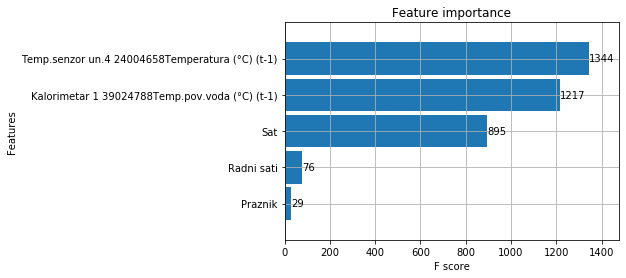

In [32]:
plot_importance(reg, height=0.9)
plt.show()

In [33]:
feat_test['Prediction'] = reg.predict(feat_test.iloc[:,1:6])

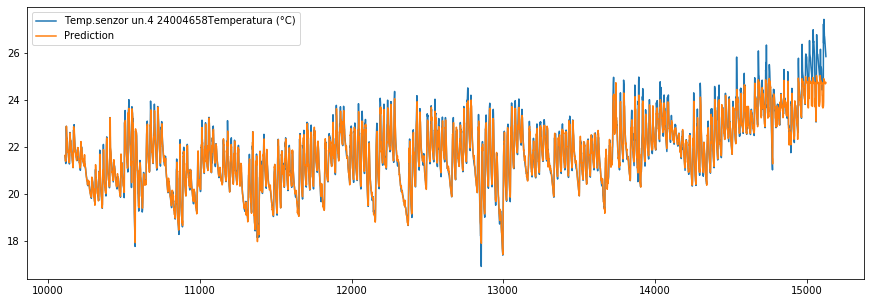

In [34]:
feat_test[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction']].plot(figsize=(15, 5))
plt.show()

In [35]:
feat_test['error'] =feat_test['Temp.senzor un.4 24004658Temperatura (°C)'] - feat_test['Prediction']
feat_test['abs_error'] = feat_test['error'].apply(np.abs)
#error_by_day = feat_test.groupby(['Godina','Mjesec','Dan u mjesecu']).mean()[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction','error','abs_error']]

In [36]:
#error_by_day.sort_values('error', ascending=True).head(10)

In [37]:
#error_by_day.sort_values('abs_error', ascending=True).head(10)

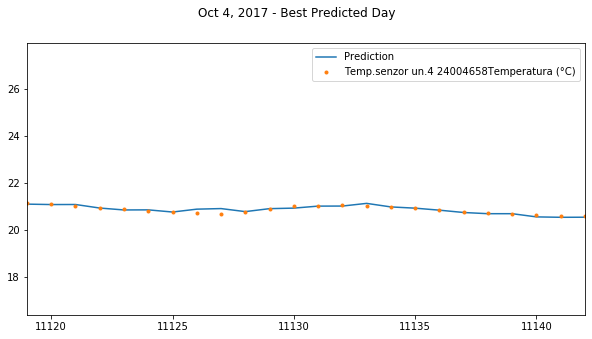

In [38]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Oct 4, 2017 - Best Predicted Day')
plt.show()

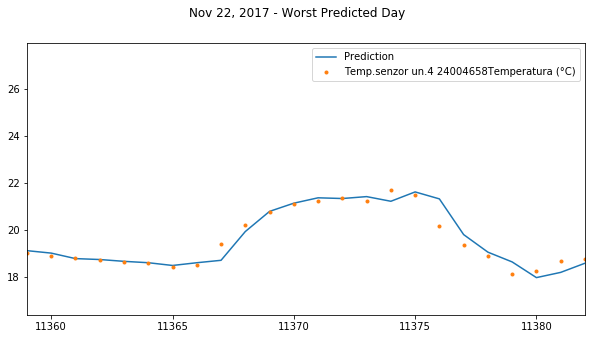

In [39]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Nov 22, 2017 - Worst Predicted Day')
plt.show()

In [40]:
# Calcuate metrics


score_mae = mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction'])
score_rmse = math.sqrt(mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.42341819503189454


In [41]:
#columns1=feat_and_lab.columns
#downsample=feat_and_lab[columns1].resample("1D", on="Datum i vrijeme").mean()

#feat_and_lab_1= downsample.copy()

In [42]:
#feat_and_lab ['Sezona'] = feat_and_lab['Mjesec'] % 12 // 3 + 1

In [43]:

#aa=feat_and_lab.index.values
#aa=feat_and_lab.index

In [44]:
#feat_and_lab.columns

In [54]:
#univariate_df["Datum i vrijeme"]=aa
univariate_df=pd.DataFrame()
univariate_df[ 'Datum i vrijeme']=feat_and_lab[ 'Datum i vrijeme'].values
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
#univariate_df['Temp.senzor un.6 (t-1)']=feat_and_lab['Temp.senzor un.6 24007412Temperatura (°C) (t-1)'].values
univariate_df[ 'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)']=feat_and_lab[ 'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)'].values
univariate_df['Temp.senzor un.4(t-1)']=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C) (t-1)'].values
#univariate_df[ 'Diff_4_6']=feat_and_lab[ 'Diff_4_6'].values
#univariate_df[ 'Diff_4_pov']=feat_and_lab[ 'Diff_4_pov'].values
#univariate_df[ 'Kalorimetar 1 39024788Kum.protok (m3) (t-1)']=feat_and_lab[ 'Kalorimetar 1 39024788Kum.protok (m3) (t-1)'].values
univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
#univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
#univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
#univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
#Univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
#univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
#univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
#univariate_df[ 'Praznik']=feat_and_lab[ 'Praznik'].values
univariate_df['Radni sati']=feat_and_lab[ 'Radni sati'].values
univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [55]:
univariate_df.corr()

,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),Temp.senzor un.4(t-1),Sat,Radni sati,Temp
Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),1.000000,0.345730,0.192161,0.670058,0.391358
Temp.senzor un.4(t-1),0.345730,1.000000,0.218989,0.291507,0.979458
Sat,0.192161,0.218989,1.000000,0.131601,0.185366
Radni sati,0.670058,0.291507,0.131601,1.000000,0.335170
Temp,0.391358,0.979458,0.185366,0.335170,1.000000


In [56]:
len(univariate_df.columns)


6

In [57]:
train_size = int(0.85 * len(feat_and_lab))
test_size = len(feat_and_lab) - train_size

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame((univariate_df.iloc[:train_size, 1:5])),  pd.DataFrame((univariate_df.iloc[:train_size,5]))
x_valid, y_valid = pd.DataFrame((univariate_df.iloc[train_size:,1:5])), pd.DataFrame((univariate_df.iloc[train_size:, 5]))

print(len(train), len(x_valid))

12829 2265


In [58]:
x_train

,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),Temp.senzor un.4(t-1),Sat,Radni sati
0,19.5,21.11,1,0
1,19.4,21.06,2,0
2,19.3,21.04,3,0
3,19.2,21.01,4,0
4,19.1,20.98,5,0
...,...,...,...,...
12824,51.1,19.08,10,1
12825,51.8,20.28,11,1
12826,51.8,20.90,12,1
12827,51.7,21.43,13,1


In [59]:
y_valid.shape

(2265, 1)

In [60]:
y_train.shape

(12829, 1)

In [61]:
# Fit model
model = ARIMA(y_train.values, order=(2,0,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(2265)
#se, conf
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 2.2288609535535198


In [62]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4998.354, Time=1.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114348.982, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4409.980, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4405.432, Time=1.99 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.18 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4230.546, Time=6.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4400.066, Time=1.39 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=4434.154, Time=8.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4396.190, Time=2.54 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3939.291, Time=9.70 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3937.314, Time=8.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4236.062,

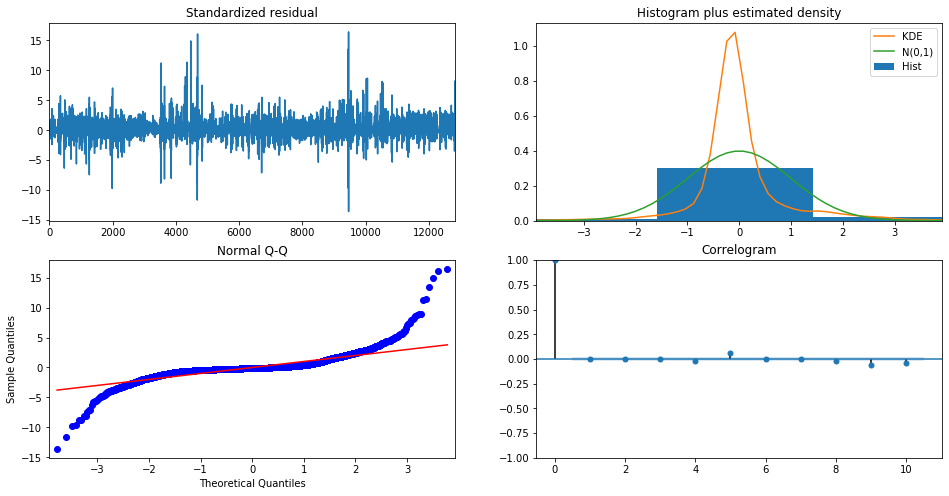

In [63]:
model.plot_diagnostics(figsize=(16,8))
plt.show()


AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

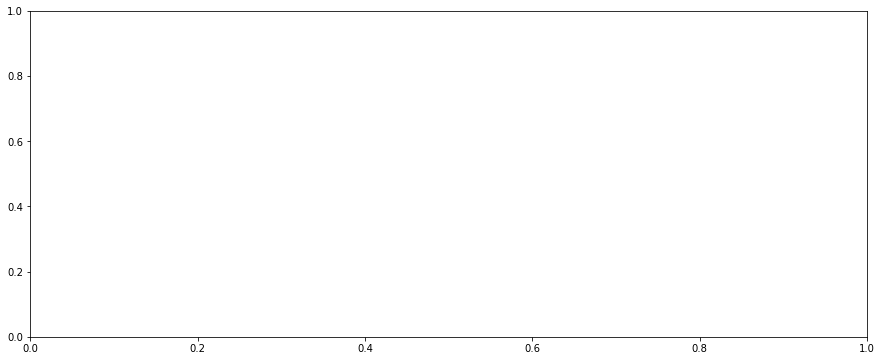

In [64]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 2265, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['Temp '], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [ ]:
#univariate_df["Datum i vrijeme"]=aa
#univariate_df=pd.DataFrame()
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
#univariate_df['T pol (t-1)']=feat_and_lab['T pol (t-1)'].values
#univariate_df['T pov (t-1)']=feat_and_lab['T pov (t-1)'].values
#univariate_df['T vanj(t-1)']=feat_and_lab['T vanj(t-1)'].values
#univariate_df['T prost (t-1)']=feat_and_lab['T prost (t-1)'].values
#univariate_df['Grijanje_K1']=feat_and_lab['Grijanje_K1'].values
#univariate_df[ 'Broj sati grijanja']=feat_and_lab[ 'Broj sati grijanja_K1'].values
#univariate_df[ 'Negrijano']=feat_and_lab[ 'Negrijano'].values
#univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
#univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
#univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
#univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
#univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
#univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
#univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
#univariate_df[ 'Datum i vrijeme']=feat_and_lab[ 'Datum i vrijeme'].values

#univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [65]:
univariate_df.columns

Index(['Datum i vrijeme', 'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
       'Temp.senzor un.4(t-1)', 'Sat', 'Radni sati', 'Temp '],
      dtype='object')

In [83]:
feature_columns = [#'Temp.senzor un.6 (t-1)', 
    'Temp.senzor un.4(t-1)', 'Sat',
       #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       #'Dan u mjesecu',
    "Datum i vrijeme" ,'Praznik', 'Radni sati', ]
target_column = ['Temp ']


In [84]:

train_size = int(0.85 * len(univariate_df))
multivariate_df = univariate_df[['Datum i vrijeme','Temp ','Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
                                 'Temp.senzor un.4(t-1)',
 'Sat',
 #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       #'Dan u mjesecu',
                                  'Radni sati']].copy()
multivariate_df.columns = ['ds', 'y'#'Temp.senzor un.6 (t-1)',
                           ,'Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
                           'Temp.senzor un.4(t-1)',
 'Sat',
                           #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
     #  'Dan u mjesecu',
                           'Radni sati']

train = multivariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()


,ds,y,Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1),Temp.senzor un.4(t-1),Sat,Radni sati
0,2015-10-01 01:00:00,21.06,19.5,21.11,1,0
1,2015-10-01 02:00:00,21.04,19.4,21.06,2,0
2,2015-10-01 03:00:00,21.01,19.3,21.04,3,0
3,2015-10-01 04:00:00,20.98,19.2,21.01,4,0
4,2015-10-01 05:00:00,20.94,19.1,20.98,5,0


In [101]:
# Train the model


from fbprophet import Prophet


# Train the model
model = Prophet()

model = Prophet()
#model.add_regressor('Temp.senzor un.6 (t-1)')
model.add_regressor('Temp.senzor un.4(t-1)')
model.add_regressor('Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)')
#model.add_regressor('Sat')
#model.add_regressor('Dan u sedmici')
#model.add_regressor('Mjesec')
#model.add_regressor('Godina')
#model.add_regressor('Kvartal')
#model.add_regressor('Dan u godini')
#model.add_regressor('Dan u mjesecu')

#model.add_regressor("Praznik")
#model.add_regressor('Radni sati') 

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.27135191755785587


In [94]:
# Train the model


from fbprophet import Prophet


# Train the model
model = Prophet()

model1 = Prophet()
#model.add_regressor('Temp.senzor un.6 (t-1)')
#model.add_regressor('Temp.senzor un.4(t-1)')
#model.add_regressor('Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)')
#model.add_regressor('Sat')
#model.add_regressor('Dan u sedmici')
#model.add_regressor('Mjesec')
#model.add_regressor('Godina')
#model.add_regressor('Kvartal')
#model.add_regressor('Dan u godini')
#model.add_regressor('Dan u mjesecu')

#model.add_regressor("Praznik")
#model.add_regressor('Radni sati') 

# Fit the model with train set
#model.fit(train)
model1.fit(train)
future = model1.make_future_dataframe(periods=24)
forecast = model1.predict(future)

# Predict on valid set
#y_pred = model.predict(x_valid)

# Calcuate metrics
#score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
#score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

#print('RMSE: {}'.format(score_rmse))

In [ ]:
y_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [95]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12848,2018-02-12 14:00:00,22.726397,21.520710,23.935348
12849,2018-02-13 14:00:00,23.165451,21.918418,24.378052
12850,2018-02-14 14:00:00,23.303901,22.167058,24.641697
12851,2018-02-15 14:00:00,23.345773,22.163477,24.486722
12852,2018-02-16 14:00:00,23.463076,22.304271,24.673075


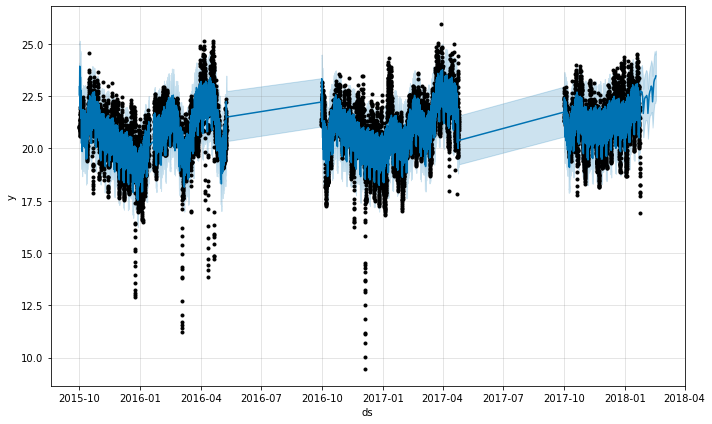

In [98]:
fig1 = model1.plot(forecast)

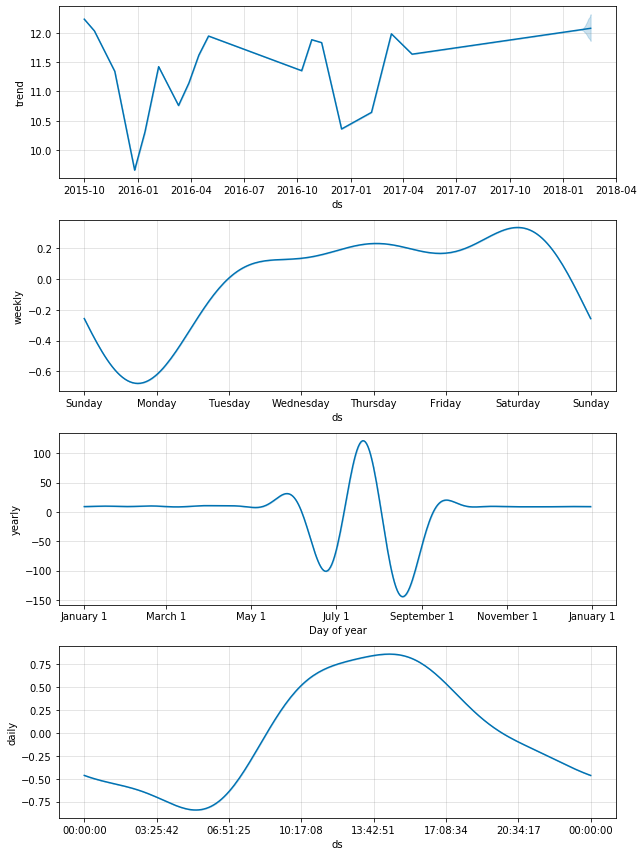

In [100]:
fig2 = model1.plot_components(forecast)


In [69]:
from sklearn.preprocessing import MinMaxScaler

data = multivariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.35415505],
       [-0.3552705 ],
       [-0.35694367],
       [-0.35861684],
       [-0.36084774],
       [-0.36196319],
       [-0.36363636],
       [-0.36586726],
       [-0.36475181],
       [-0.36307864]])

In [70]:
look_back = 1
train_size = int(0.85 * len(scaled_data))
test_size = len(scaled_data) - train_size

train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

In [71]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train,1)
x_test, y_test = create_dataset(test, 1)


In [72]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

12827 2265


In [73]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[0], x_train.shape[1])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_valid))

model.summary()

Epoch 1/5


12809/12827 [============================>.] - ETA: 0s - loss: 6.7738e-04

12827/12827 [==============================] - 33s 2ms/step - loss: 6.7907e-04 - val_loss: 519.9722
Epoch 2/5
12827/12827 [==============================] - 29s 2ms/step - loss: 4.5213e-04 - val_loss: 520.3036
Epoch 3/5
12827/12827 [==============================] - 29s 2ms/step - loss: 4.2318e-04 - val_loss: 520.2902
Epoch 4/5
12827/12827 [==============================] - 30s 2ms/step - loss: 4.0327e-04 - val_loss: 519.6274
Epoch 5/5
12827/12827 [==============================] - 29s 2ms/step - loss: 4.0042e-04 - val_loss: 519.2830
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12827, 128)        66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)     

In [74]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))

RMSE: 0.4506972420290504


In [75]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor

In [76]:
feat_and_lab["Temp.senzor un.3 24003393Temperatura (°C)"]=file["Temp.senzor un.3 24003393Temperatura (°C)"]

In [77]:
train_size = int(0.85 * len(feat_and_lab))
test_size = len(feat_and_lab) - train_size

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame((univariate_df.iloc[:train_size, 1:5])),  pd.DataFrame((univariate_df.iloc[:train_size,5:7]))
x_valid, y_valid = pd.DataFrame((univariate_df.iloc[train_size:,1:5])), pd.DataFrame((univariate_df.iloc[train_size:, 5:7]))

print(len(train), len(x_valid))

12829 2265


In [78]:
model=MultiOutputRegressor(AdaBoostRegressor(random_state=0, n_estimators=10000)).fit(x_train,y_train)
print(model.score(x_train,y_train))

0.9210095944770474


In [79]:
y_pred=model.predict(x_valid)

In [80]:
y_pred

array([[22.0097018 ],
       [22.11880796],
       [22.11880796],
       ...,
       [23.31542091],
       [23.31542091],
       [23.31542091]])

In [81]:
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.7458146826083156
